# Model Reproducibility

In this notebook I will reproduce one of the examples from the publication associated to the model and make sure the Ersilia Model Hub implementation is giving the same results.
The test is explained in the ReadMe File

In [2]:
# In this codeblock I will import the necessary packages and specify the paths to relevant folders
import pathlib
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Appplying some settings to pandas for clear representation of data
pd.set_option('display.max_columns',None)
pd.set_option('max_colwidth', 30)

### Week 2 Task Description
1. Select a dataset to reproduce the result of the model through original implementation: Here, I have taken [EX4.csv](https://github.com/GIST-CSBL/BayeshERG/blob/main/data/External/EX4.csv) which was the external dataset used by the authors of the publication for testing the BayeshERG model.
2. Identify a result you could reproduce from the publication: Since the model deals not only with the predictions but also the uncertainities that come along, I have decided to compare the hERG blocking activity score , epistemic and aleatoric unceratainity as well as total variance of the publication implementation (BayeshERG) vs the model fetched from ersilia (eos4tcc).
3. Check that the model provides the same results when running via the Ersilia Model Hub: In the last section , I will compare the results obatined through the two methods.

## BayeshERG results

In [5]:
# In this codeblock I will load the predictions obtained from the original author's code implementation from the /data folder
predictions1=pd.read_csv('/Users/ashitasrivastava/Desktop/projects/ERSILIA/model-validation-example/data/EX4_predictions_BayeshERG.csv')
print(predictions1.head(5))

     id                         smiles  label     score      alea      epis
0  EX_1  Cn1nc(N)c2cn([C@@H]3O[C@H]...      0  0.141578  0.102390  0.019144
1  EX_2  CCS(=O)(=O)N1CC(CC#N)(n2cc...      0  0.131855  0.107643  0.006826
2  EX_3  COCCNCCCn1c(C(=O)CF)c(-c2c...      0  0.924603  0.065492  0.004220
3  EX_4  Cc1cn2c(-c3cn[nH]c3)cnc2c(...      0  0.110497  0.093529  0.004759
4  EX_5  COc1cc(CCc2cc(NC(=O)c3ccc(...      0  0.715075  0.176588  0.027155


In [6]:
#modifying the dataframe to depict the uncertainity associated with the observations
#NOTE: Variance is a property I have added for analyis, it is not the output of the model, the model has only three outputs 'score','alea' and 'epis'

predictions1['variance']=predictions1['alea']+predictions1['epis']
print(predictions1.head(5))



     id                         smiles  label     score      alea      epis  \
0  EX_1  Cn1nc(N)c2cn([C@@H]3O[C@H]...      0  0.141578  0.102390  0.019144   
1  EX_2  CCS(=O)(=O)N1CC(CC#N)(n2cc...      0  0.131855  0.107643  0.006826   
2  EX_3  COCCNCCCn1c(C(=O)CF)c(-c2c...      0  0.924603  0.065492  0.004220   
3  EX_4  Cc1cn2c(-c3cn[nH]c3)cnc2c(...      0  0.110497  0.093529  0.004759   
4  EX_5  COc1cc(CCc2cc(NC(=O)c3ccc(...      0  0.715075  0.176588  0.027155   

   variance  
0  0.121534  
1  0.114469  
2  0.069712  
3  0.098288  
4  0.203743  


In [7]:
# In this codeblock I will recreate the figure or value I am to reproduce, for example an AUROC

#All the graphs will be saved in results_EX4_BayeshERG folder present in the images folder
folder_location1 = "/Users/ashitasrivastava/Desktop/projects/ERSILIA/model-validation-example/data/images/results_EX4_BayeshERG"

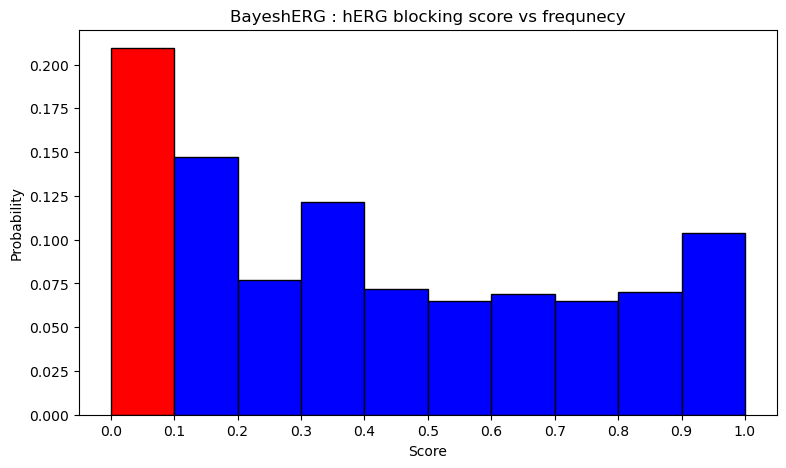

In [8]:
# Plot between the hERG blocking activity of molecules and their frequency
plt.figure(figsize=(9,5))
b = np.arange(0.0, 1.1, 0.1)
score=predictions1['score'].to_list()
weights = np.ones_like(score) / float(len(score))
plt.hist(score, bins=b, edgecolor='black',weights=weights,color='blue')
max_probability_bin = plt.gca().patches[max(range(len(plt.gca().patches)), key=lambda i: plt.gca().patches[i].get_height())]
max_probability_bin.set_facecolor('red')
plt.title('BayeshERG : hERG blocking score vs frequnecy')
plt.xlabel('Score')
ticks=np.arange(0.0,1.1,0.1)
plt.xticks(ticks)
plt.ylabel('Probability')
plt.savefig(folder_location1 + "/plot1.png")
plt.show()

<Figure size 500x500 with 0 Axes>

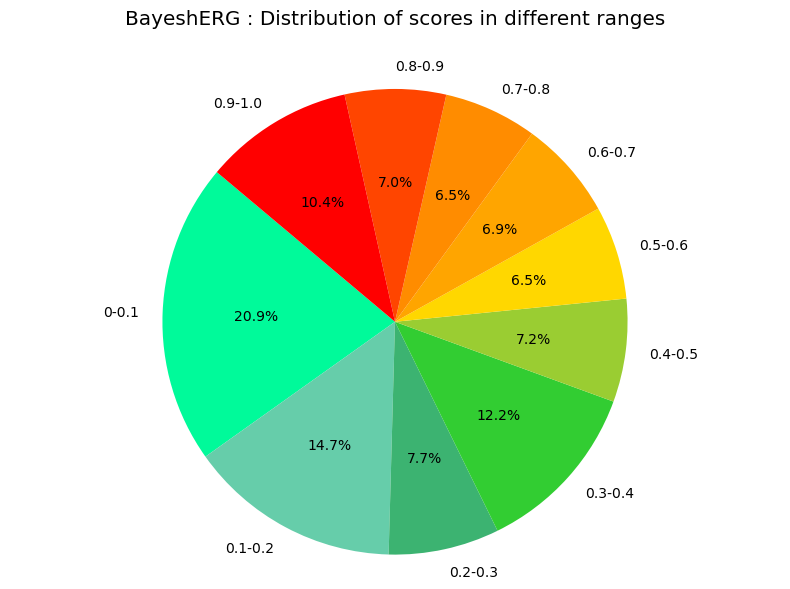

In [238]:
# showing the percentage of each interval of hERG blocking activity
plt.style.use('ggplot')
colors = ['mediumspringgreen', 'mediumaquamarine', 'mediumseagreen', 'limegreen', 'yellowgreen', 'gold', 'orange', 'darkorange', 'orangered', 'red']
plt.figure(figsize=(5,5))
ranges = [(0, 0.1), (0.1, 0.2), (0.2,0.3), (0.3,0.4), (0.4,0.5), (0.5,0.6), (0.6,0.7), (0.7,0.8), (0.8,0.9), (0.9,1.0)]
categories = []
for value in predictions1['score']:
    for r in ranges:
        if r[0] <= value < r[1]:
            categories.append(r)
            break
counts = pd.Series(categories).value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=[f'{r[0]}-{r[1]}' for r in counts.index], autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('BayeshERG : Distribution of scores in different ranges',pad=30)
plt.axis('equal')
plt.savefig(folder_location1 + "/plot2.png")
plt.show()

<Figure size 500x500 with 0 Axes>

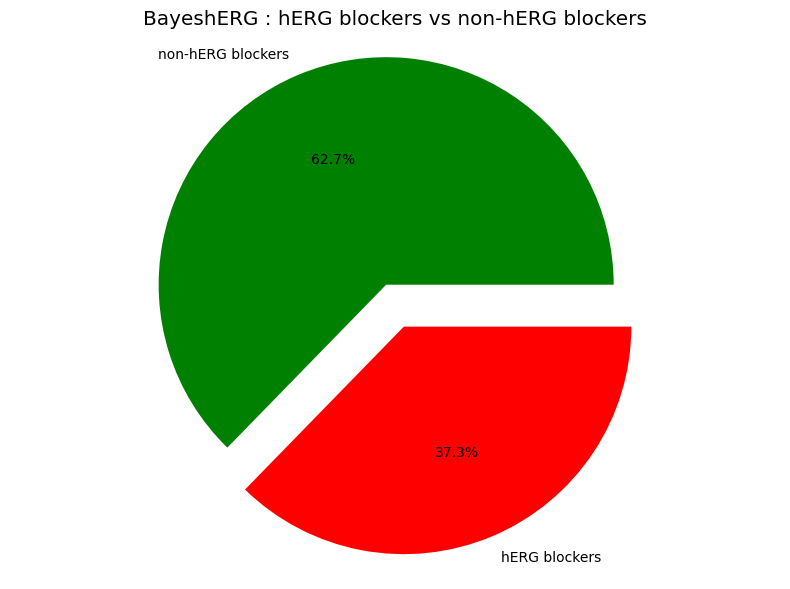

In [239]:
plt.figure(figsize=(5,5))
ranges = [(0, 0.5), (0.5,1.0)]
colors=['green','red']
categories = []
for value in predictions1['score']:
    for r in ranges:
        if r[0] <= value < r[1]:
            categories.append(r)
            break
counts = pd.Series(categories).value_counts().sort_index()
plt.figure(figsize=(8, 6))
labels=['non-hERG blockers','hERG blockers']
explode=(0.1,0.1)
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=0,explode=explode,colors=colors)
plt.title('BayeshERG : hERG blockers vs non-hERG blockers')
plt.axis('equal')
plt.savefig(folder_location1 + "/plot3.png")
plt.show()

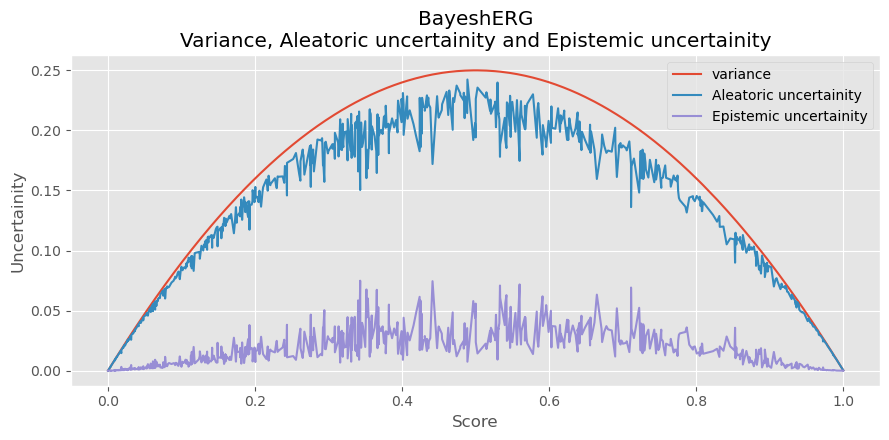

In [240]:
# sorting the dataframe accoring to the score values to make inferences about uncertainity

sorted_df1=predictions1.sort_values(by='score')

#making the line graphs here
plt.figure(figsize=(9,4.5))
plt.title('BayeshERG\nVariance, Aleatoric uncertainity and Epistemic uncertainity')
plt.xlabel('Score')
plt.ylabel('Uncertainity')
plt.plot(sorted_df1.score,sorted_df1.variance,label='variance')
plt.plot(sorted_df1.score,sorted_df1.alea,label='Aleatoric uncertainity')
plt.plot(sorted_df1.score,sorted_df1.epis,label='Epistemic uncertainity')
plt.legend()
plt.savefig(folder_location1 + "/plot4.png")
plt.show()

## eos4tcc results

In [ ]:
#EX_4 dataset doesn't have standard smiles, so I followed the code below to create a suitable dataset with standard smiles to be fed into the 
#ersilia model eos4tcc, following the exact same proceedure as in notebook 1, the final dataset EX4_dataset is fed to the model to generate predictons
#standard smiles was not a requirement for the BayeshERG model, so did not create this dataset before

df = pd.read_csv('/Users/ashitasrivastava/Desktop/projects/ERSILIA/model-validation-example/data/EX4.csv')
smiles_list=df['smiles'].tolist()

import smiles_processing
from smiles_processing import standardise_smiles

standard_smiles_list=standardise_smiles(smiles_list)
standard_smiles_list=[standardize_smiles(x) for x in smiles_list]
standard_smiles_list
newdf = pd.DataFrame(standard_smiles_list, columns=['standard smiles'])
newdf.to_csv('/Users/ashitasrivastava/Desktop/projects/ERSILIA/model-validation-example/data/EX4_dataset.csv',index=False)

In [10]:
# In this codeblock I will load the predictions obtained from the Ersilia Model Hub implementation saved in the /data folder
predictions2=pd.read_csv('/Users/ashitasrivastava/Desktop/projects/ERSILIA/model-validation-example/data/EX4_predictions_eos4tcc.csv')
print(predictions2.head(5))

                           key                          input     score  \
0  URLYINUFLXOMHP-HTVVRFAVSA-N  CN1N=C(N)c2cn([C@@H]3O[C@H...  0.610415   
1  XUZMWHLSFXCVMG-UHFFFAOYSA-N  CCS(=O)(=O)N1CC(CC#N)(n2cc...  0.616747   
2  UPTQGXMIZXGVSC-UHFFFAOYSA-N  COCCNCCCn1c(C(=O)CF)c(-c2c...  0.618441   
3  OOGMREBBHKGEMT-UHFFFAOYSA-N  Cc1cn2c(-c3cn[nH]c3)cnc2c(...  0.622243   
4  VRQMAABPASPXMW-HDICACEKSA-N  COc1cc(CCc2cc(NC(=O)c3ccc(...  0.611695   

       alea      epis  
0  0.220448  0.017361  
1  0.219622  0.016748  
2  0.217922  0.018049  
3  0.217206  0.017850  
4  0.224637  0.012888  


In [11]:
#modifying the dataframe to depict the uncertainity associated with the observations
#NOTE: Variance is a property I have added for analyis, it is not the output of the model, the model has only three outputs 'score','alea' and 'epis'

predictions2['variance']=predictions2['alea']+predictions2['epis']
print(predictions2.head(5))



                           key                          input     score  \
0  URLYINUFLXOMHP-HTVVRFAVSA-N  CN1N=C(N)c2cn([C@@H]3O[C@H...  0.610415   
1  XUZMWHLSFXCVMG-UHFFFAOYSA-N  CCS(=O)(=O)N1CC(CC#N)(n2cc...  0.616747   
2  UPTQGXMIZXGVSC-UHFFFAOYSA-N  COCCNCCCn1c(C(=O)CF)c(-c2c...  0.618441   
3  OOGMREBBHKGEMT-UHFFFAOYSA-N  Cc1cn2c(-c3cn[nH]c3)cnc2c(...  0.622243   
4  VRQMAABPASPXMW-HDICACEKSA-N  COc1cc(CCc2cc(NC(=O)c3ccc(...  0.611695   

       alea      epis  variance  
0  0.220448  0.017361  0.237809  
1  0.219622  0.016748  0.236370  
2  0.217922  0.018049  0.235972  
3  0.217206  0.017850  0.235057  
4  0.224637  0.012888  0.237524  


In [12]:
#All the graphs will be saved in results_EX4_eos4tcc folder present in the images folder
folder_location2 = "/Users/ashitasrivastava/Desktop/projects/ERSILIA/model-validation-example/data/images/results_EX4_eos4tcc"

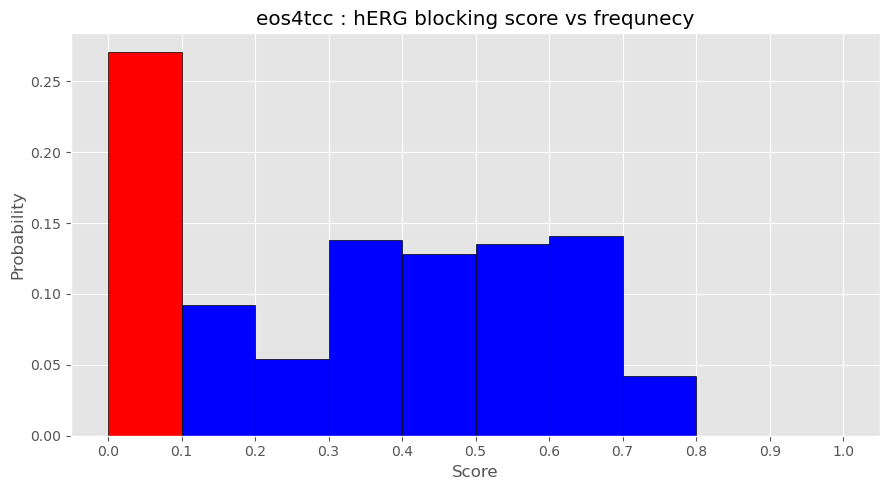

In [244]:
# Plot between the hERG blocking activity of molecules and their frequency
plt.figure(figsize=(9,5))
b = np.arange(0.0, 1.1, 0.1)
score=predictions2['score'].to_list()
weights = np.ones_like(score) / float(len(score))
plt.hist(score, bins=b, edgecolor='black',weights=weights,color='blue')
max_probability_bin = plt.gca().patches[max(range(len(plt.gca().patches)), key=lambda i: plt.gca().patches[i].get_height())]
max_probability_bin.set_facecolor('red')
plt.title('eos4tcc : hERG blocking score vs frequnecy')
plt.xlabel('Score')
ticks=np.arange(0.0,1.1,0.1)
plt.xticks(ticks)
plt.ylabel('Probability')
plt.savefig(folder_location2 + "/plot1.png")
plt.show()

<Figure size 500x500 with 0 Axes>

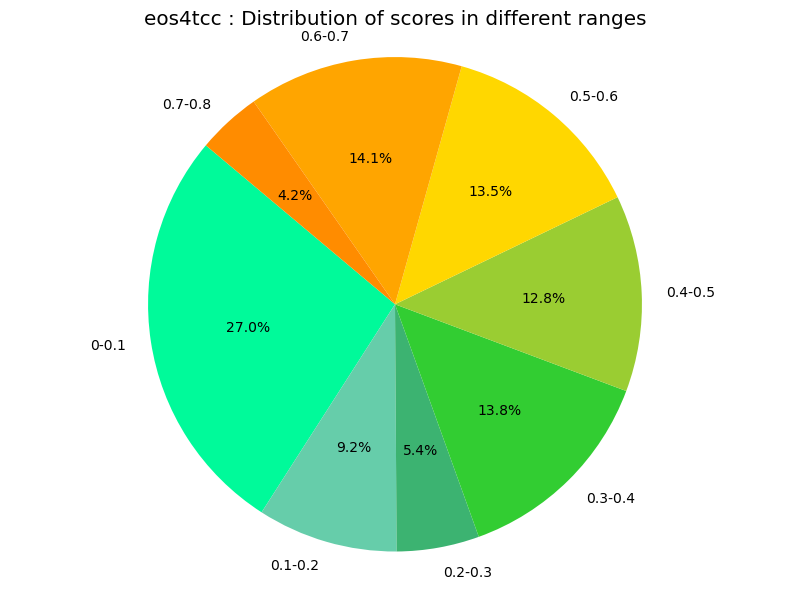

In [245]:
# showing the percentage of each interval of hERG blocking activity
colors = ['mediumspringgreen', 'mediumaquamarine', 'mediumseagreen', 'limegreen', 'yellowgreen', 'gold', 'orange', 'darkorange', 'orangered', 'red']
plt.figure(figsize=(5,5))
ranges = [(0, 0.1), (0.1, 0.2), (0.2,0.3), (0.3,0.4), (0.4,0.5), (0.5,0.6), (0.6,0.7), (0.7,0.8), (0.8,0.9), (0.9,1.0)]
categories = []
for value in predictions2['score']:
    for r in ranges:
        if r[0] <= value < r[1]:
            categories.append(r)
            break
counts = pd.Series(categories).value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=[f'{r[0]}-{r[1]}' for r in counts.index], autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('eos4tcc : Distribution of scores in different ranges')
plt.axis('equal')
plt.savefig(folder_location2 + "/plot2.png")
plt.show()

<Figure size 500x500 with 0 Axes>

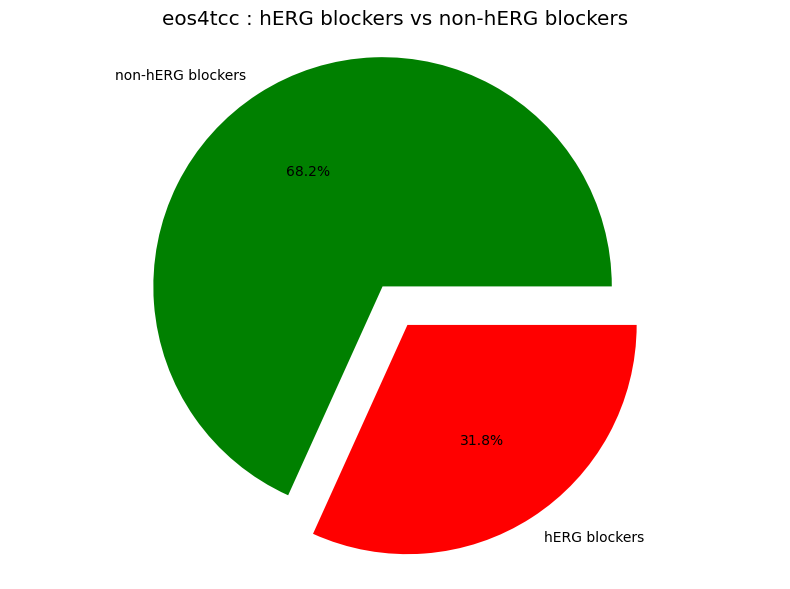

In [246]:
plt.figure(figsize=(5,5))
ranges = [(0, 0.5), (0.5,1.0)]
categories = []
colors=['green','red']
for value in predictions2['score']:
    for r in ranges:
        if r[0] <= value < r[1]:
            categories.append(r)
            break
counts = pd.Series(categories).value_counts().sort_index()
plt.figure(figsize=(8, 6))
labels=['non-hERG blockers','hERG blockers']
explode=(0.1,0.1)
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=0,explode=explode, colors=colors)
plt.title('eos4tcc : hERG blockers vs non-hERG blockers')
plt.axis('equal')
plt.savefig(folder_location2 + "/plot3.png")
plt.show()

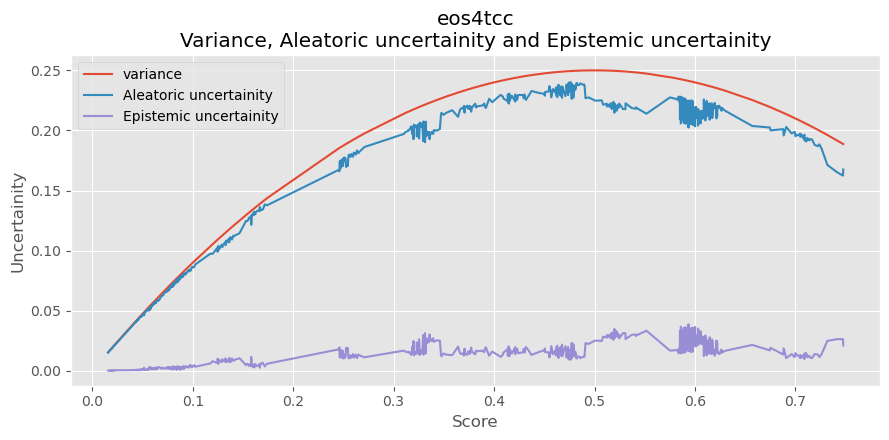

In [247]:
# sorting the dataframe accoring to the score values to make inferences about uncertainity

sorted_df2=predictions2.sort_values(by='score')

#making the line graphs here
plt.figure(figsize=(9,4.5))
plt.title('eos4tcc\nVariance, Aleatoric uncertainity and Epistemic uncertainity')
plt.xlabel('Score')
plt.ylabel('Uncertainity')
plt.plot(sorted_df2.score,sorted_df2.variance,label='variance')
plt.plot(sorted_df2.score,sorted_df2.alea,label='Aleatoric uncertainity')
plt.plot(sorted_df2.score,sorted_df2.epis,label='Epistemic uncertainity')
plt.legend()
plt.savefig(folder_location2 + "/plot4.png")
plt.show()

## Comparison between predictions of BayeshERG and eos4tcc Models

In [14]:
# In this codeblock I will compare the orginal implementation vs the EMH result

#saving all the comparison results into the comparison folder in images
folder_location3="/Users/ashitasrivastava/Desktop/projects/ERSILIA/model-validation-example/data/images/comparison"

### Bar Chart 📊

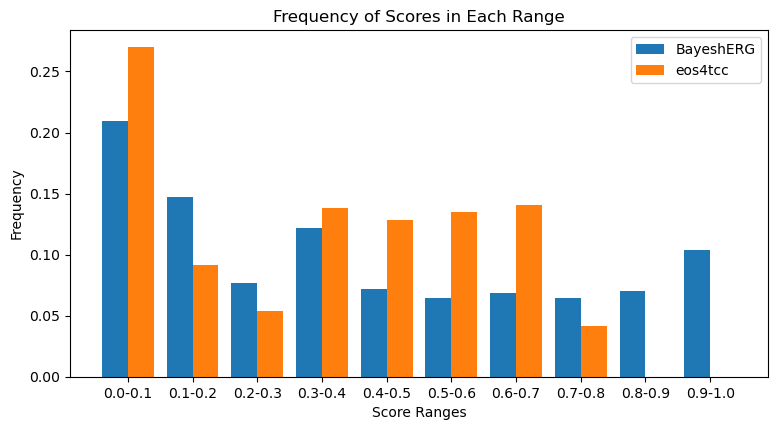

In [17]:
# Plot between the hERG blocking activity of molecules and their frequency

plt.figure(figsize=(9,4.5))
score1=predictions1['score'].to_list()
weights1 = np.ones_like(score1) / float(len(score1))
score2=predictions2['score'].to_list()
weights2 = np.ones_like(score2) / float(len(score2))
bin_ranges = np.arange(0, 1.1, 0.1)
bin_labels = [f'{i:.1f}-{i+0.1:.1f}' for i in np.arange(0, 1.0, 0.1)]
hist1, _ = np.histogram(score1, bins=bin_ranges,weights=weights1)
hist2, _ = np.histogram(score2, bins=bin_ranges,weights=weights2)
X_axis = np.arange(len(bin_labels))
bar_width = 0.4
plt.bar(X_axis - bar_width/2, hist1, bar_width, label='BayeshERG')
plt.bar(X_axis + bar_width/2, hist2, bar_width, label='eos4tcc')
plt.xticks(X_axis, bin_labels)
plt.xlabel('Score Ranges')
plt.ylabel('Frequency')
plt.title('Frequency of Scores in Each Range')
plt.legend()
plt.savefig(folder_location3 + "/bar_graph.png")
plt.show()

### Inferences

Similarity: 
1. Relative number of hERG and non-hERG blockers: We can see that in both the predictions, the number of non-hERG blockers (hERG blocking activity score < 0.5) is greater than the number of hERG-blockers (hERG blocking activity score >= 0.5).

Differences:
1. BIAS: BayeshERG model gives an appreciable number of strong hERG blockers (hERG blocking activity score > 0.8) but the eos4tcc model reports no strong hERG blockers. We can say that eos4tcc is biased towards making non-hERG predictions and hardly reports the strong hERG blockers. Also , it has a bias towards reporting very weak-hERG blocking activity as it significantly reports much more molecules in the lower range of hERG blocking activity score (0-0.2) in comparison to BayeshERG.

Let's look at pie charts for even better visualisation !

### Pie Charts 🟡

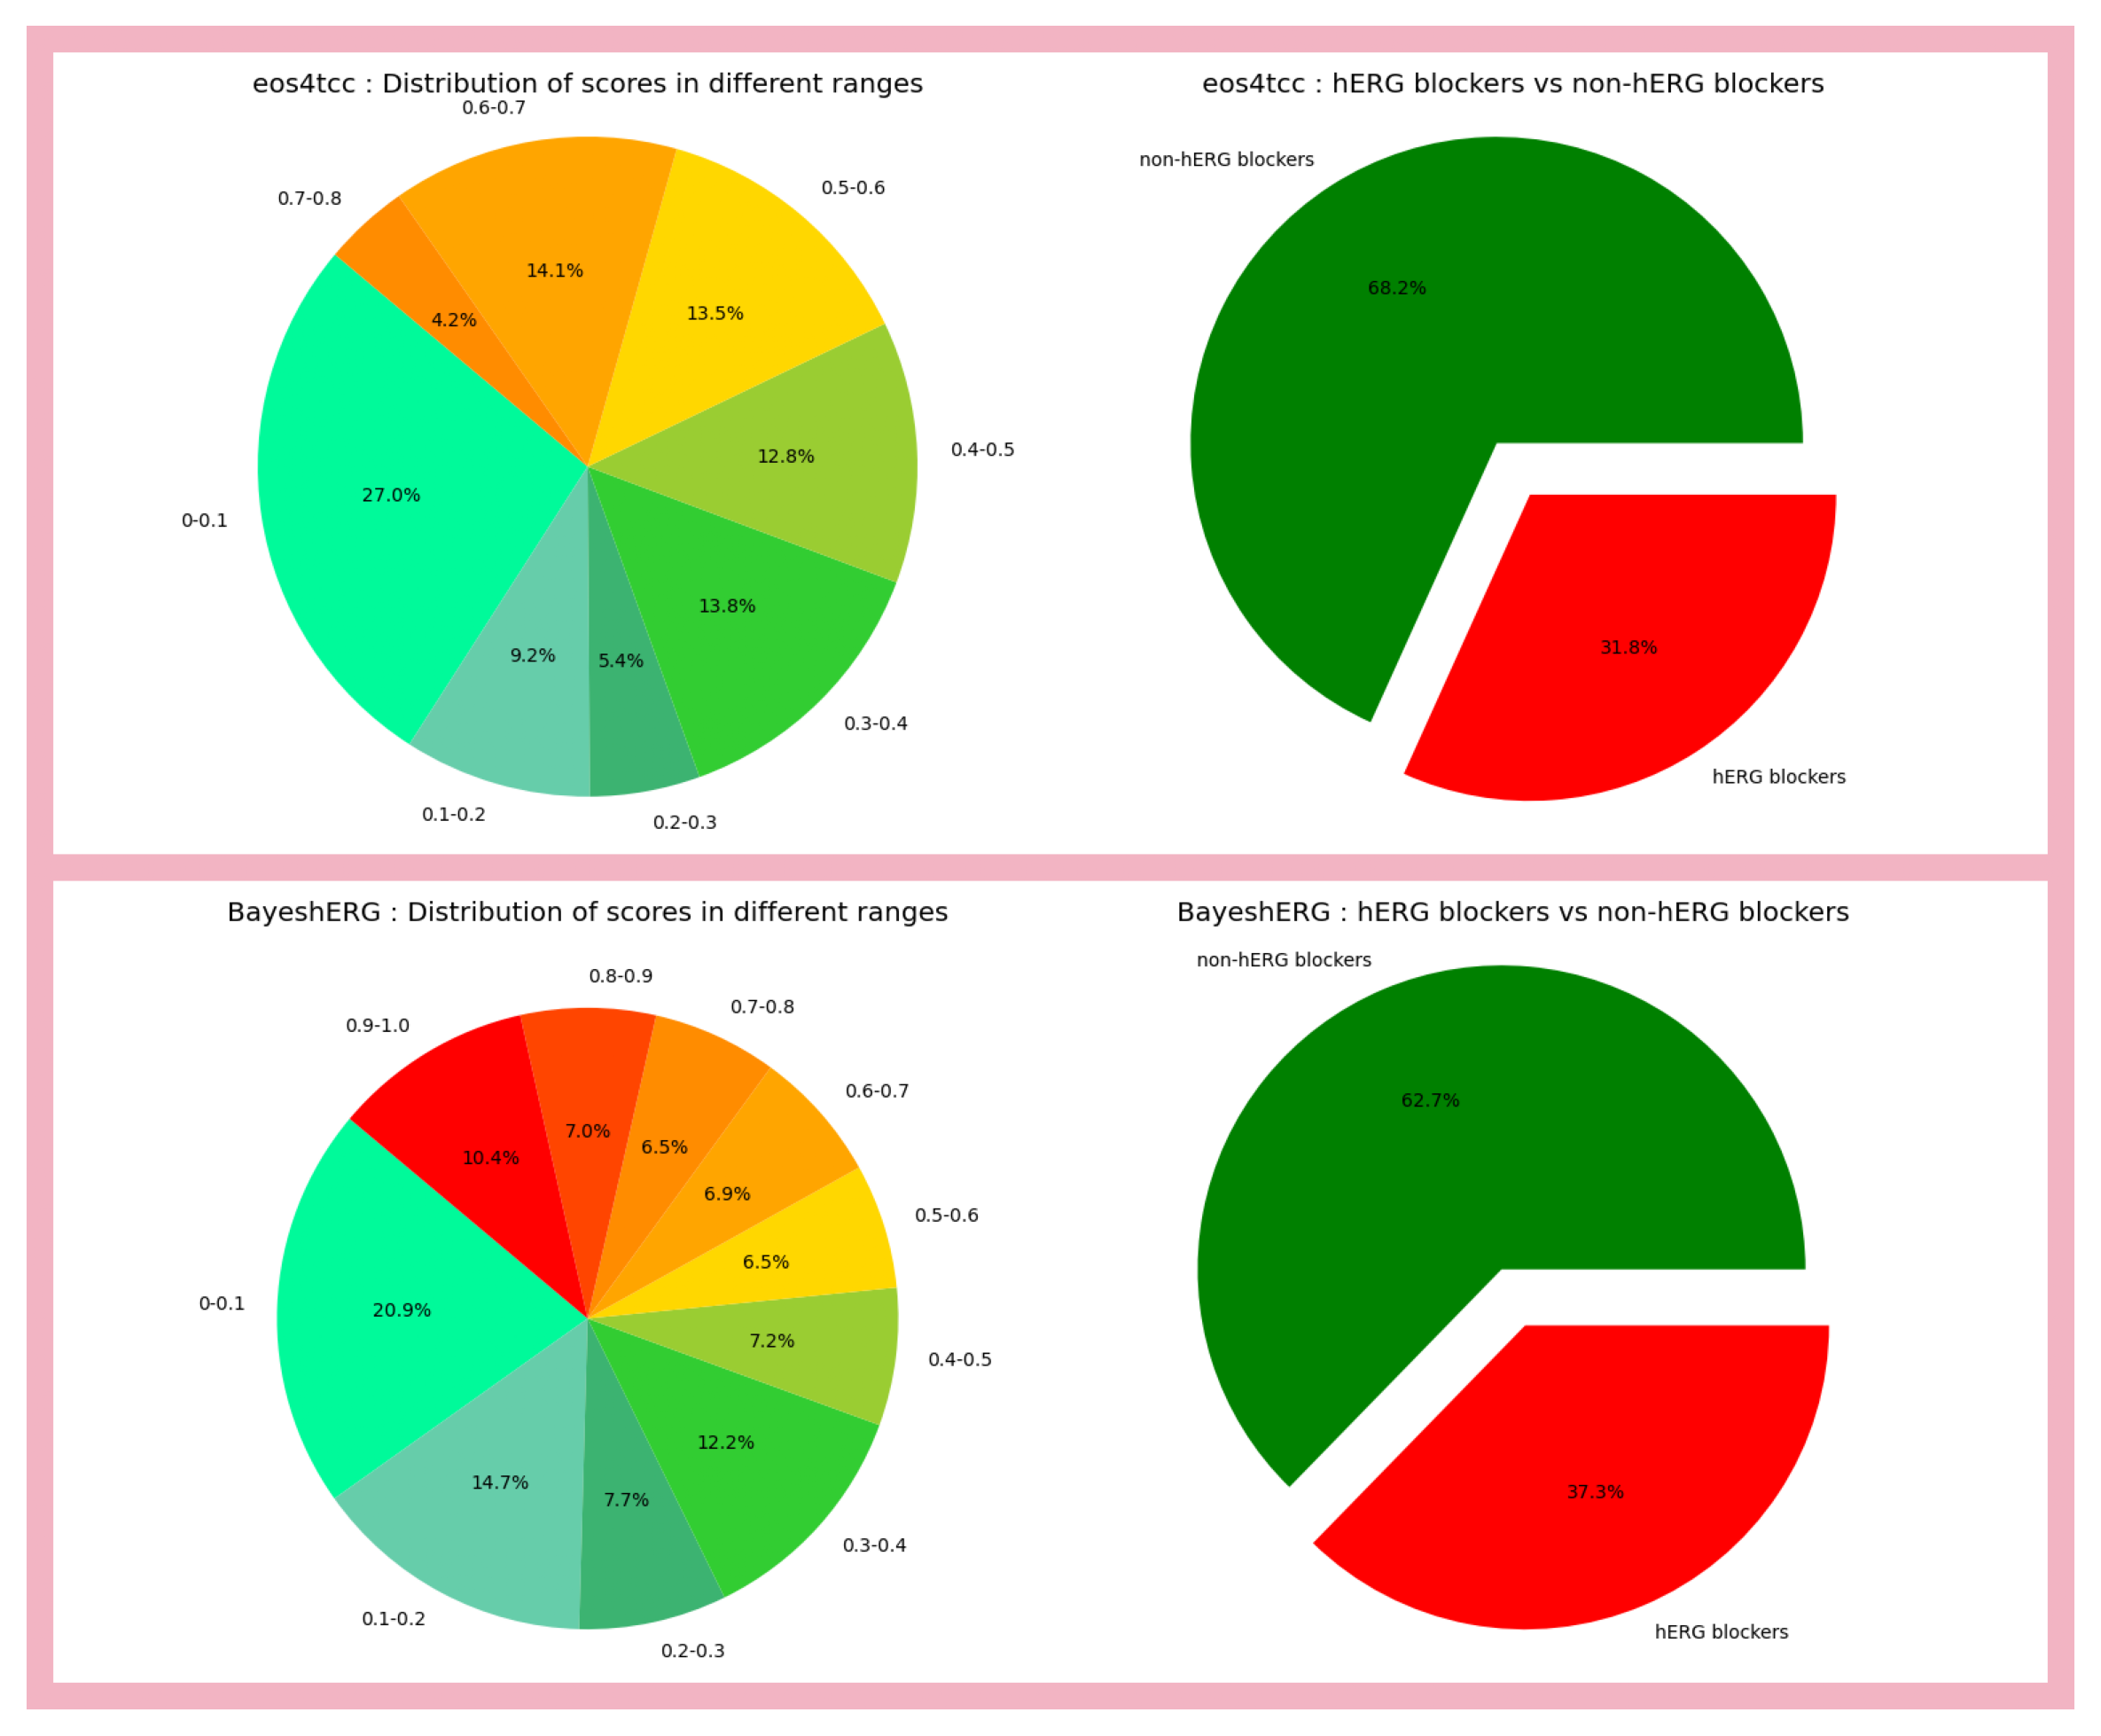

In [250]:
### Comparing the pie charts

image = plt.imread('/Users/ashitasrivastava/Desktop/projects/ERSILIA/model-validation-example/data/images/comparison/pie_charts.png')
plt.figure(figsize=(8, 8),dpi=300)
plt.imshow(image)
plt.axis('off')
plt.show()


### Inferences

Similarity: 
1. Both the models report approximately 65% non-blockers and 35% blockers

Differences:
1. BIAS: We can see that there are hardly any strong blockers for eos4tcc model (red  and orangered zones) but they do exist in the BayeshERG model. Thus, eos4tcc is biased towards reporting molecules as non-hERG blockers and hardly reports strong hERG-blockers.
2. Percentage Difference : In terms of overall predictions, eos4tcc detects 14.7% less hERG blockers in comparsion to the original publication model BayeshERG.


### Comparing the uncertainities 🤔

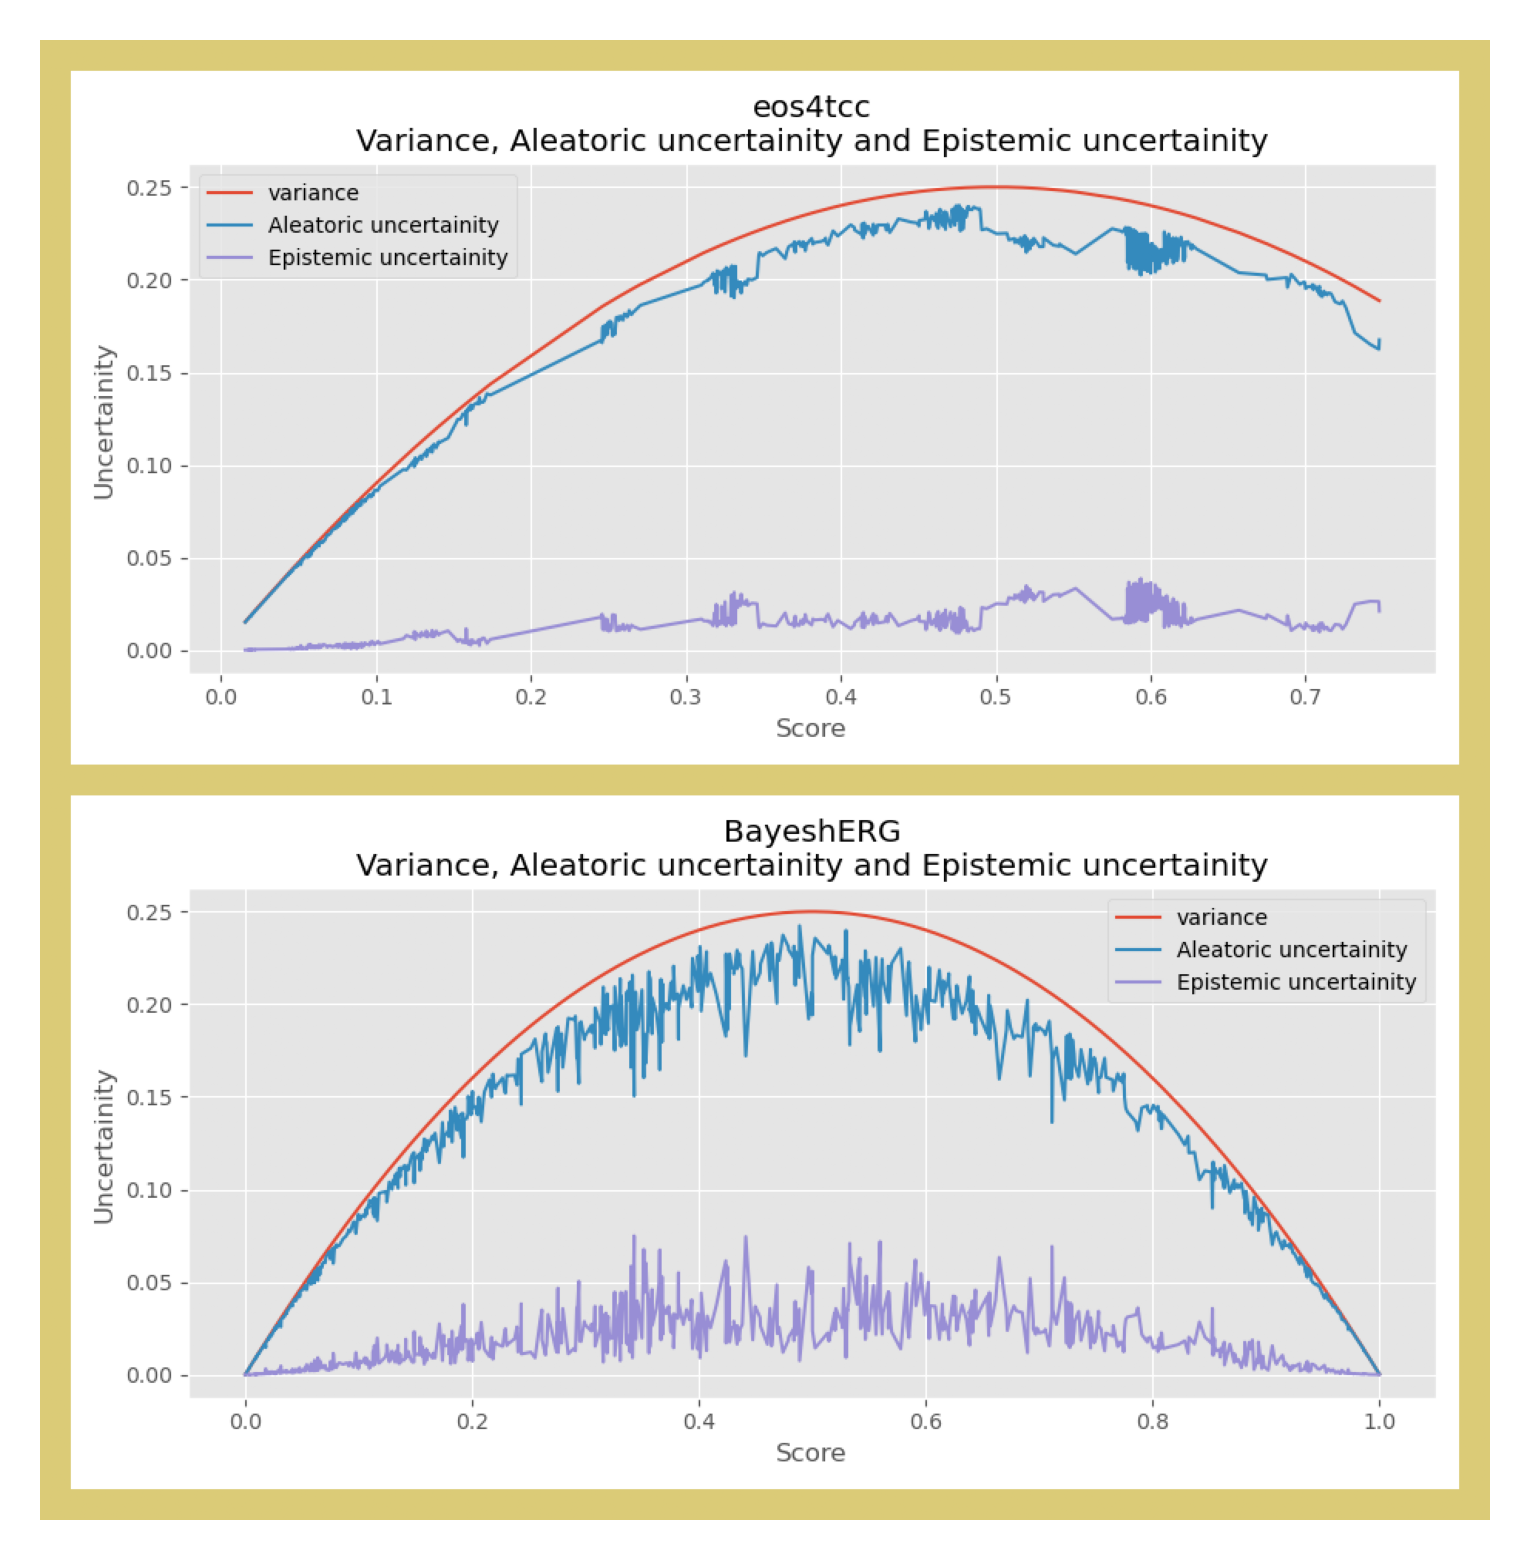

In [251]:
### Comparing the unceratainity graphs

image = plt.imread('/Users/ashitasrivastava/Desktop/projects/ERSILIA/model-validation-example/data/images/comparison/uncertainity.png')
plt.figure(figsize=(4, 4),dpi=400)
plt.imshow(image)
plt.axis('off')
plt.show()


### Inferences

There are significant differences when it comes to the uncertainities.

1. Overall variance: We can see that the overall variance almost follows a normal distribution for the BayeshERG model whereas for the eos4tcc model, it increases in the beginning, reaches a peak value and then falls. However, there is a similarity in terms of the maximum value of variance which for both the models remains around 0.25.
2. Epistemic uncertainity: It remains almost constant for both the models but for the eos4tcc model, it is lower . This means that the model is under-reporting the epistemic uncertainity.
3. Aleatoric uncertainity: It varies just like the variance, follows a somewhat normal distribution for BayeshERG model and increases in the beginning, reaches a peak value and then falls for the eos4tcc model.

## Final Comment on Reproducibility ✔️

Since the model focusses on both predictions as well as uncertainities let's talk about both!

1. Predictions: The models eos4tcc and give similar results but the error in reporting hERG blocker is 14.7% which an appreciable value. eos4tcc is hardly able to predict any strong hERG blockers whereas BayeshERG does which is a strong feature of BayeshERG as mentioned in the publication.
2. Uncertainities: When it comes to the overall uncertainity/variance values, the models show significant difference in terms of the pattern they follow although the maximum variance reported by both the model remians about 0.25. The epistemic uncertainity doesn't vary much and the aleatoric uncertainity folows a pattern very similar to the variance.

THUS THE MODEL IS REPRODUCIBLE BUT NEEDS A LOT OF IMPROVEMENT AS APPRECIABLE DIFFERENCES EXIST!